# **Nonlinear Pendulum Equation**

In this section, we'll explore the equation of motion for a nonlinear pendulum with air friction. The equation describes the angular displacement of the pendulum as it oscillates. The equation takes into account the effects of air friction, making it a nonlinear differential equation.

The equation of motion for the pendulum is given by:

$$
\ddot{\theta} = -\frac{g}{L} \sin(\theta) - \frac{b}{m} \dot{\theta}
$$

Where:
- $\theta$ $\to$ angular displacement of the pendulum at time $t$,
- $g$ $\to$ acceleration due to gravity,
- $L$ $\to$ length of the pendulum,
- $b$ $\to$ damping coefficient due to air friction,
- $m$ $\to$ mass of the pendulum.

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
def angular_acceleration(theta, omega, g=9.81, L=1, b=0.1, m=1):
    """
    Angular acceleration for a pendulum
    INPUTS:
        theta: angle of the pendulum
        omega: angular velocity of the pendulum
        g: gravitational acceleration
        L: length of the pendulum
        b: damping coefficient
        m: mass of the pendulum
    OUTPUTS:
        angular acceleration
    """

    return (-g / L) * math.sin(theta) - (b / m) * omega

def euler_method(theta_0, omega_0, t_0, t_f, dt, g=9.81, L=1, b=0.1, m=1):
    """
    Euler method for solving a second order differential equation
    INPUTS:
        theta_0: initial angle of the pendulum
        omega_0: initial angular velocity of the pendulum
        t_0: initial time
        t_f: final time
        dt: time step
        g: gravitational acceleration
        L: length of the pendulum
        b: damping coefficient
        m: mass of the pendulum
    OUTPUTS:
        time_values: list of time values
        theta_values: list of angle values
        omega_values: list of angular velocity values    
    """
    
    time_values = []
    theta_values = []
    omega_values = []

    # Initial conditions
    t = t_0
    theta = theta_0
    omega = omega_0
    
    while t <= t_f:
        time_values.append(t)
        theta_values.append(theta)
        omega_values.append(omega)

        omega += dt * angular_acceleration(theta, omega, g, L, b, m)
        theta += dt * omega
        t += dt

    return time_values, theta_values, omega_values

In [4]:
# Parameters
g = 9.8     # acceleration due to gravity (m/s^2)
L = 1.0      # length of the pendulum (m)
b = 0.1      # damping coefficient due to air friction
m = 1.0      # mass of the pendulum (kg)

# Initial conditions
theta_0 = math.pi / 4
omega_0 = 0.0

# Time parameters
t_0 = 0.0
t_f = 10.0
dt = 0.1

time_values, theta_values, omega_values = euler_method(
    theta_0=theta_0, omega_0=omega_0,
    t_0=t_0, t_f=t_f, dt=dt,
    g=g, L=L, b=b, m=m
)

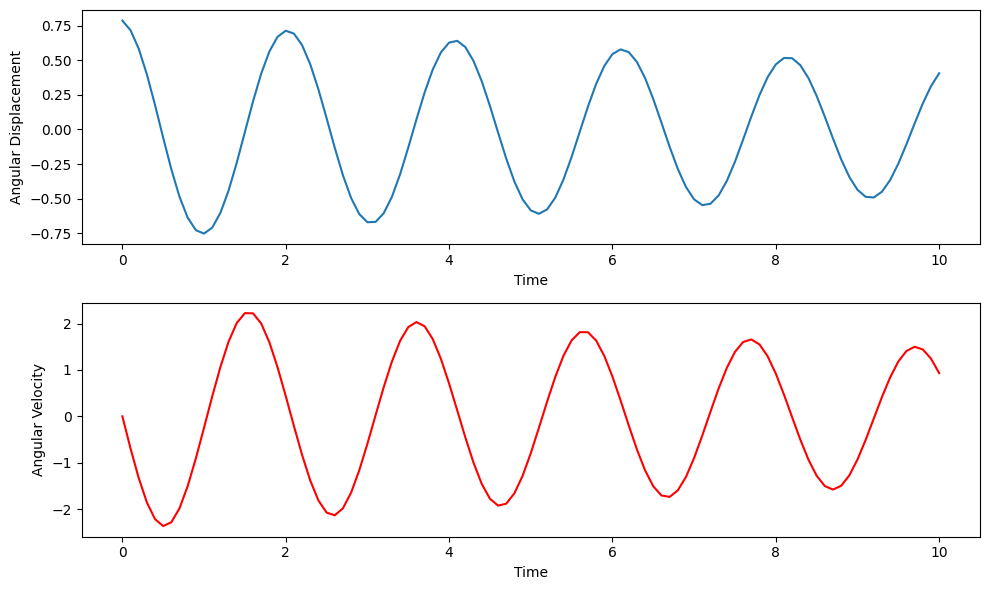

In [5]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_values, theta_values)
plt.xlabel('Time')
plt.ylabel('Angular Displacement')

plt.subplot(2, 1, 2)
plt.plot(time_values, omega_values, 'r')
plt.xlabel('Time')
plt.ylabel('Angular Velocity')

plt.tight_layout()
plt.show()
